In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#load and read the file
df=pd.read_csv("RTA Dataset.csv")
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
df.shape

(12316, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df.dtypes.value_counts()

object    30
int64      2
Name: count, dtype: int64

In [8]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [9]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'],
        axis = 1, inplace = True)
df.head()


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [12]:
df["Accident_severity"].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Accident severity')

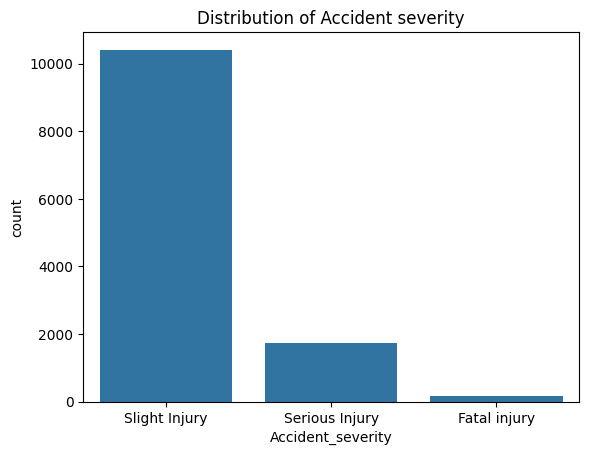

In [13]:
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')


In [14]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
print(categorical)

['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [15]:

for i in categorical:
    df[i] = df[i].fillna(df[i].mode()[0])

In [16]:
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

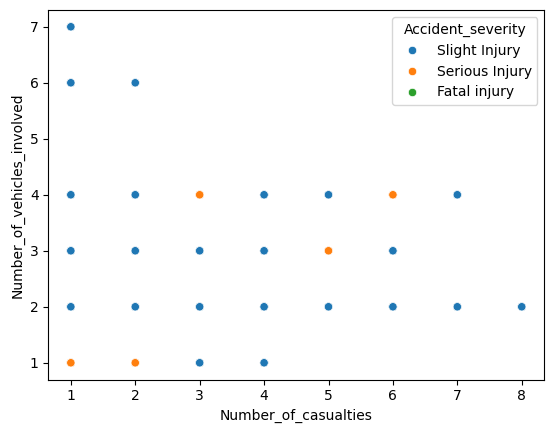

In [17]:
#plotting relationship between Number_of_casualties and Number_of_vehicles_involved
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])
     

In [18]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

In [19]:
df.select_dtypes(include=['number']).corr()

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


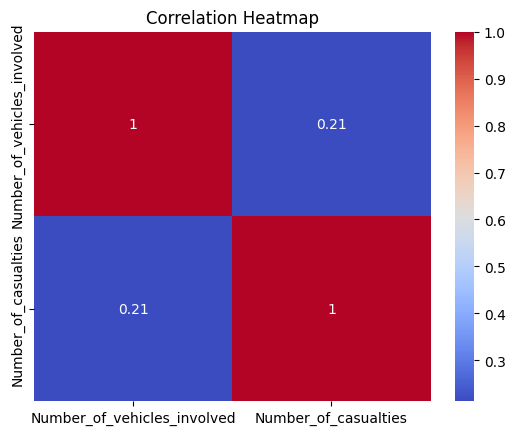

In [20]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
#storing numerical column names to a variable
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerica variables are',numerical)

The numerica variables are ['Number_of_vehicles_involved', 'Number_of_casualties']


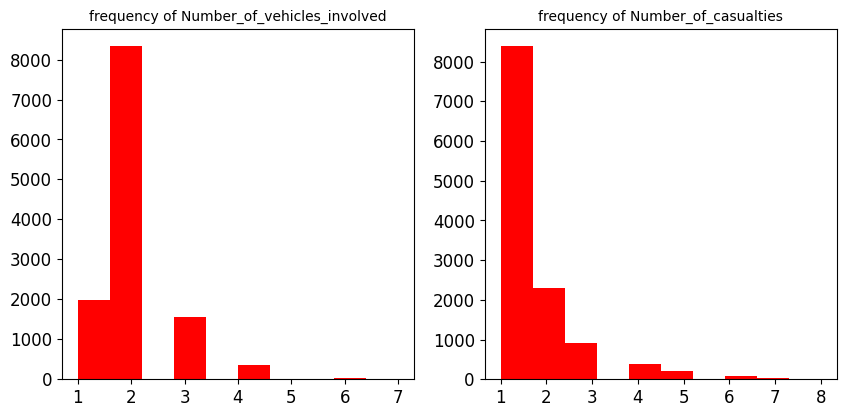

In [22]:
#distribution for numerical columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1

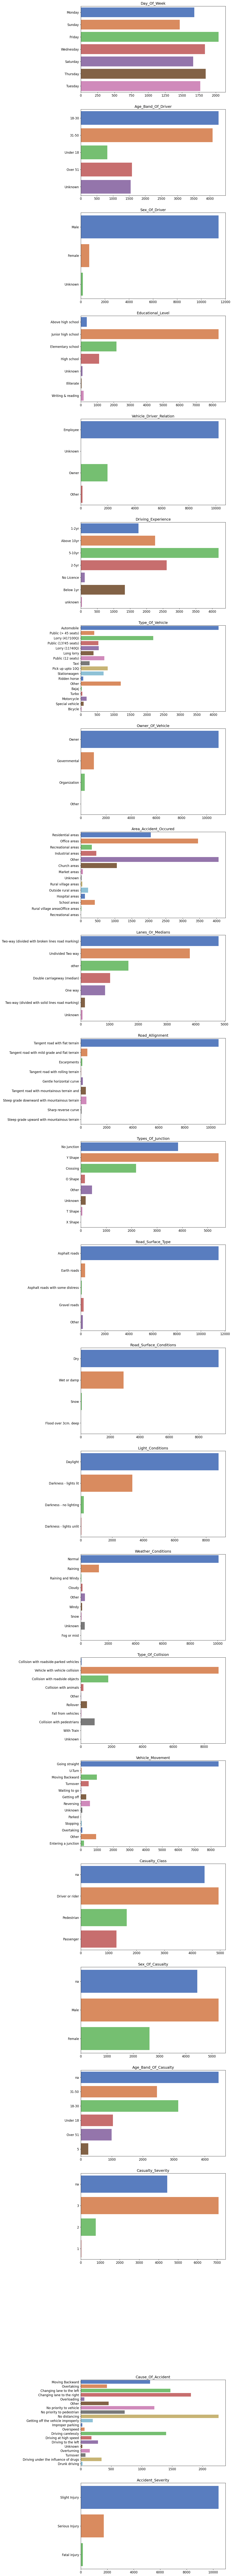

In [23]:
#count plot for categorical values
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1

In [24]:
#importing label encoing module
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#creating a new data frame from performing the chi2 analysis
df1=pd.DataFrame()

#adding all the categorical columns except the output to new data frame
for i in categorical:
    if i!= 'Accident_severity':
        df1[i]=le.fit_transform(df[i])

In [25]:
#confirming the data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              12316 non-null  int64
 1   Age_band_of_driver       12316 non-null  int64
 2   Sex_of_driver            12316 non-null  int64
 3   Educational_level        12316 non-null  int64
 4   Vehicle_driver_relation  12316 non-null  int64
 5   Driving_experience       12316 non-null  int64
 6   Type_of_vehicle          12316 non-null  int64
 7   Owner_of_vehicle         12316 non-null  int64
 8   Area_accident_occured    12316 non-null  int64
 9   Lanes_or_Medians         12316 non-null  int64
 10  Road_allignment          12316 non-null  int64
 11  Types_of_Junction        12316 non-null  int64
 12  Road_surface_type        12316 non-null  int64
 13  Road_surface_conditions  12316 non-null  int64
 14  Light_conditions         12316 non-null  int64
 15  We

In [26]:
df1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,2,...,3,2,3,2,3,2,5,3,5,9
1,1,1,1,4,0,3,11,3,6,4,...,3,2,8,2,3,2,5,3,5,16
2,1,0,1,4,0,0,5,3,1,6,...,3,2,2,2,0,1,1,2,5,0
3,3,0,1,4,0,2,11,0,6,6,...,0,2,8,2,2,0,0,2,5,1
4,3,0,1,4,0,1,0,3,4,6,...,0,2,8,2,3,2,5,3,5,16


In [27]:
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Accident_severity'])

In [28]:
#f_p_values will return Fscore and pvalues
f_p_values

(array([ 0.15822071,  8.91539214,  0.1431894 ,  0.17458477,  5.34534549,
         4.49967858,  1.07767124,  1.10426215,  3.61654037,  3.28161464,
         0.1319306 ,  3.08648691,  6.99480557,  0.61510308, 16.08282359,
         1.14934538, 10.09632283,  2.20071197,  3.2168602 ,  0.12594479,
        13.77841337,  0.20273788,  0.39747982,  3.19366551]),
 array([9.23937958e-01, 1.15890328e-02, 9.30908116e-01, 9.16409114e-01,
        6.90673790e-02, 1.05416165e-01, 5.83427189e-01, 5.75721597e-01,
        1.63937473e-01, 1.93823502e-01, 9.36163348e-01, 2.13686893e-01,
        3.02759144e-02, 7.35244973e-01, 3.21854237e-04, 5.62889079e-01,
        6.42112839e-03, 3.32752607e-01, 2.00201664e-01, 9.38969394e-01,
        1.01872169e-03, 9.03599597e-01, 8.19763078e-01, 2.02536988e-01]))

In [29]:
f_p_values1=pd.DataFrame({'features':df1.columns, 'Fscore': f_p_values[0], 'Pvalues':f_p_values[1]})
f_p_values1

,features,Fscore,Pvalues
0,Day_of_week,0.158221,0.923938
1,Age_band_of_driver,8.915392,0.011589
2,Sex_of_driver,0.143189,0.930908
3,Educational_level,0.174585,0.916409
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
6,Type_of_vehicle,1.077671,0.583427
7,Owner_of_vehicle,1.104262,0.575722
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824


In [30]:
f_p_values1.sort_values(by='Pvalues',ascending=True)

,features,Fscore,Pvalues
14,Light_conditions,16.082824,0.000322
20,Age_band_of_casualty,13.778413,0.001019
16,Type_of_collision,10.096323,0.006421
1,Age_band_of_driver,8.915392,0.011589
12,Road_surface_type,6.994806,0.030276
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824
18,Casualty_class,3.216860,0.200202


In [31]:
df2 = df.drop(["Owner_of_vehicle","Type_of_vehicle","Road_surface_conditions","Pedestrian_movement",
               "Casualty_severity","Educational_level","Day_of_week","Sex_of_driver","Road_allignment","Sex_of_casualty"],axis=1)
df2.head()


,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury


In [32]:
df2.shape

(12316, 17)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Vehicle_driver_relation      12316 non-null  object
 2   Driving_experience           12316 non-null  object
 3   Area_accident_occured        12316 non-null  object
 4   Lanes_or_Medians             12316 non-null  object
 5   Types_of_Junction            12316 non-null  object
 6   Road_surface_type            12316 non-null  object
 7   Light_conditions             12316 non-null  object
 8   Weather_conditions           12316 non-null  object
 9   Type_of_collision            12316 non-null  object
 10  Number_of_vehicles_involved  12316 non-null  int64 
 11  Number_of_casualties         12316 non-null  int64 
 12  Vehicle_movement             12316 non-null  object
 13  Casualty_class               12

In [34]:
categorical_new = [i for i in df2.columns if df2[i].dtype == 'O']
print(categorical_new)

['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident', 'Accident_severity']


In [35]:
for i in categorical_new:
  print(df2[i].value_counts())

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64
Vehicle_driver_relation
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: count, dtype: int64
Driving_experience
5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64
Area_accident_occured
Other                              4058
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas          

In [36]:
#get_dummies
dummy=pd.get_dummies(df2[['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
                          'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
                          'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
                          'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident']],drop_first=True)
dummy.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [37]:
df3 = pd.concat([df2,dummy],axis=1)
df3.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,...,False,False,False,False,False,False,False,False,False,False
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,False,False,False,False,False,False,True,False,False,False
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,...,False,False,False,False,False,False,False,False,False,False
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,False,False,False,False,False,False,False,False,False,False
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,False,False,False,False,False,False,True,False,False,False


In [38]:
df3.drop(["Age_band_of_driver","Vehicle_driver_relation","Weather_conditions","Driving_experience","Area_accident_occured","Lanes_or_Medians",
                            "Types_of_Junction","Road_surface_type","Light_conditions","Type_of_collision","Vehicle_movement","Casualty_class","Age_band_of_casualty","Cause_of_accident"],axis=1,inplace=True)

df3.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,Slight Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2,Slight Injury,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,2,Serious Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2,Slight Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2,Slight Injury,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [39]:
x=df3.drop("Accident_severity",axis=1)
x.shape

(12316, 104)

In [40]:
x.head()

,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [41]:
y=df3.iloc[:,2]
y.head()

0     Slight Injury
1     Slight Injury
2    Serious Injury
3     Slight Injury
4     Slight Injury
Name: Accident_severity, dtype: object

In [42]:
y.value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

Text(0.5, 1.0, 'Accident Severity Count')

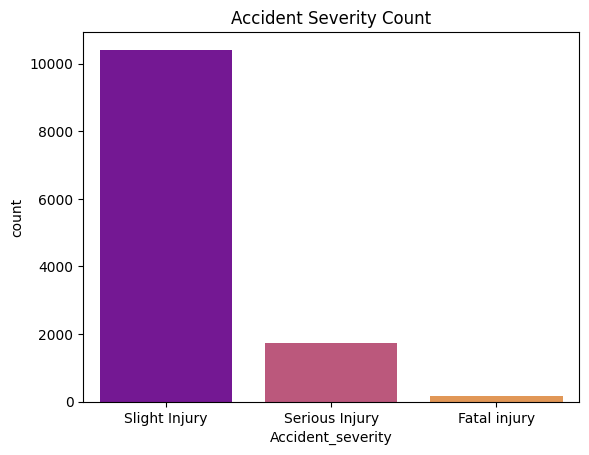

In [43]:
sns.countplot(x=y,palette="plasma")
plt.title("Accident Severity Count")

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

In [45]:
y1=pd.DataFrame(y_smote)
y1.value_counts()

Accident_severity
Fatal injury         10415
Serious Injury       10415
Slight Injury        10415
Name: count, dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

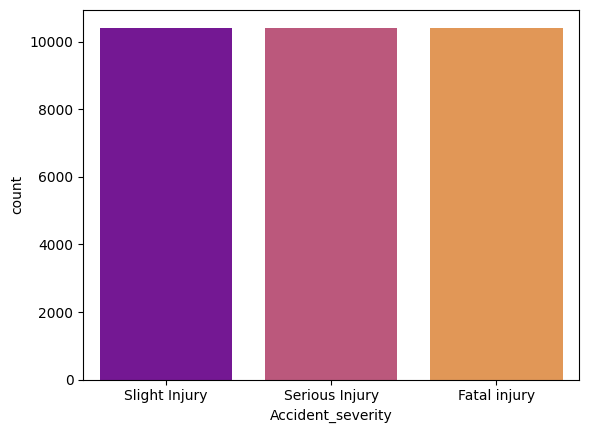

In [46]:
sns.countplot(x=y_smote,palette="plasma")

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.3,random_state=42)


In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21871, 104)
(9374, 104)
(21871,)
(9374,)


In [49]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred=model_KNN.predict(x_test)
y_pred

array(['Serious Injury', 'Slight Injury', 'Slight Injury', ...,
       'Fatal injury', 'Serious Injury', 'Slight Injury'],
      shape=(9374,), dtype=object)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
accuracy_score(y_test,y_pred)

0.7401322807766162

In [53]:
report_KNN = classification_report(y_test,y_pred)
print(report_KNN)

                precision    recall  f1-score   support

  Fatal injury       0.80      1.00      0.89      3126
Serious Injury       0.64      0.91      0.75      3144
 Slight Injury       0.97      0.31      0.47      3104

      accuracy                           0.74      9374
     macro avg       0.80      0.74      0.70      9374
  weighted avg       0.80      0.74      0.70      9374



In [54]:
matrix_KNN = confusion_matrix(y_test,y_pred)
matrix_KNN

array([[3121,    5,    0],
       [ 259, 2854,   31],
       [ 536, 1605,  963]])

[[3121    5    0]
 [ 259 2854   31]
 [ 536 1605  963]] 



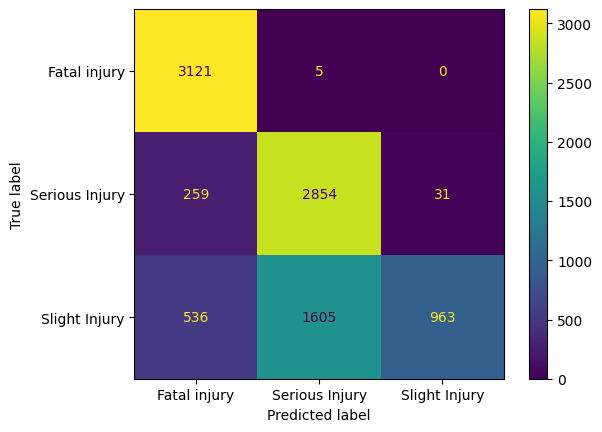

In [55]:
matrix_KNN=confusion_matrix(y_test,y_pred)
print(matrix_KNN,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
     